This note studies the correlation between the radio-to-optical offset (angular separation $\rho$ and normalized separation $X$) and the magnitude ($G$, $G_{BP}$, and $G_{RP}$).

- $\rho$ vs $G$ and $X$ vs $G$

- $\rho$ vs $G_{BP}$ and $X$ vs $G_{BP}$

- $\rho$ vs $G_{RP}$ and $X$ vs $G_{RP}$

In [1]:
from astropy.table import Table, join
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from CorrTest import NWSmooth, new_corr_test, moving_median_smooth

In [2]:
r2o = Table.read("../data/multiwav-offset-in-Gaia-frame.fits")

# Gaia EDR3 photometric information
from my_progs.catalog.read_gaia import read_edr3_icrf_sou
gedr3 = read_edr3_icrf_sou()

gedr3.keep_columns([
    "iers_name", "source_id", "phot_g_mean_mag", "phot_bp_mean_mag",
    "phot_rp_mean_mag"
])

gedr3.rename_columns(
    ["phot_g_mean_mag", "phot_bp_mean_mag", "phot_rp_mean_mag"],
    ["g_mag", "bp_mag", "rp_mag"])

r2o = join(r2o, gedr3, keys="iers_name", table_names=["", "g"])

# 1. Overall distribution of magnitude

First, we look at the distribution of the magnitude.

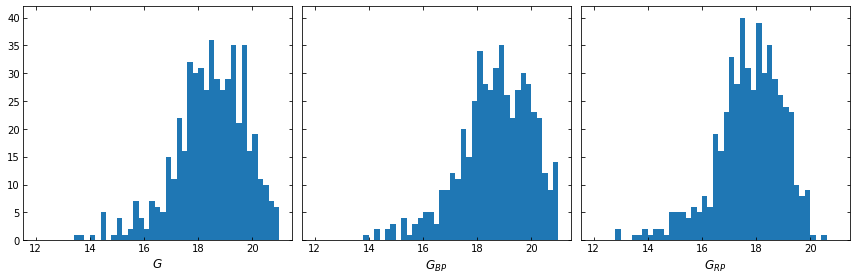

In [3]:
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(12, 4), ncols=3, sharey=True)

bins = np.arange(12, 21.1, 0.2)

ax0.hist(r2o["g_mag"], bins=bins)
ax0.set_xlabel("$G$", fontsize=12)

ax1.hist(r2o["bp_mag"], bins=bins)
ax1.set_xlabel("$G_{BP}$", fontsize=12)

ax2.hist(r2o["rp_mag"], bins=bins)
ax2.set_xlabel("$G_{RP}$", fontsize=12)

plt.tight_layout()

# 2 angular separation $\rho$ vs. magnitude

## 2.1 $\rho$ vs. $G $

In [4]:
keys = "g_mag"
r2o.sort(keys)

x = np.array(r2o[keys])
y_sx = np.array(r2o["ang_sep_sx_cor"])
y_k = np.array(r2o["ang_sep_k_cor"])
y_xka = np.array(r2o["ang_sep_ka_cor"])

nw_mean_sx = NWSmooth(x, y_sx)
nw_mean_k = NWSmooth(x, y_k)
nw_mean_xka = NWSmooth(x, y_xka)

# md_x_sx = moving_median_smooth(x)
# md_y_sx = moving_median_smooth(y_sx)
# md_y_k = moving_median_smooth(y_k)
# md_y_xka = moving_median_smooth(y_xka)

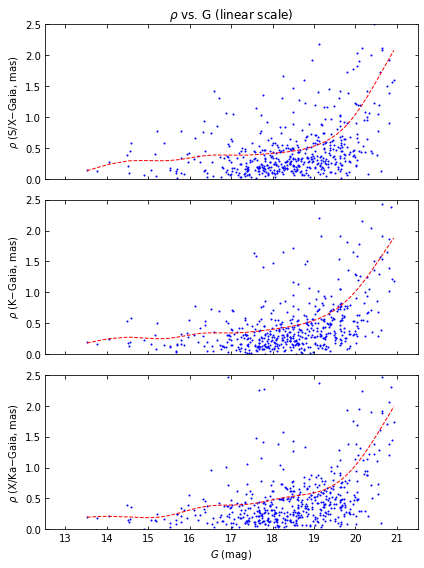

In [5]:
# Distribution of angular separation
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(6, 8), nrows=3, sharex=True, sharey=True)

ax0.plot(x, y_sx, "b.", ms=2)
ax1.plot(x, y_k, ".b", ms=2)
ax2.plot(x, y_xka, "b.", ms=2)

# Smoothed data
ax0.plot(x, nw_mean_sx, "r--", lw=1)
ax1.plot(x, nw_mean_k, "r--", lw=1)
ax2.plot(x, nw_mean_xka, "r--", lw=1)

# ax0.plot(md_x_sx, md_y_sx, "k--")
# ax1.plot(md_x_sx, md_y_k, "k--")
# ax2.plot(md_x_sx,md_y_xka, "k--")

ax0.set_xlim([12.5, 21.5])
ax0.set_ylim([0, 2.5])

ax0.set_ylabel("$\\rho$ (S/X$-$Gaia, mas)")
ax1.set_ylabel("$\\rho$ (K$-$Gaia, mas)")
ax2.set_ylabel("$\\rho$ (X/Ka$-$Gaia, mas)")
ax2.set_xlabel("$G$ (mag)")

ax0.set_title("$\\rho$ vs. G (linear scale)")

plt.subplots_adjust()
plt.tight_layout()

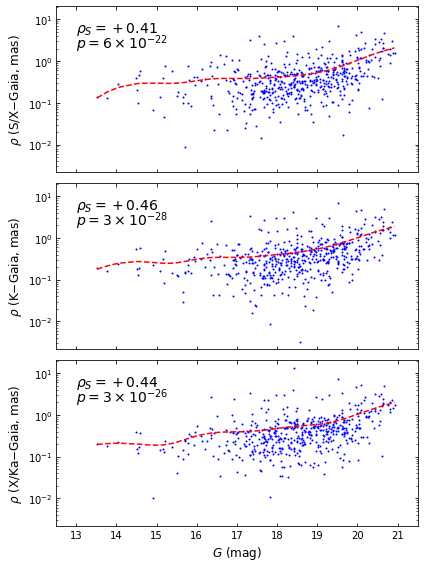

In [6]:
# Distribution of angular separation
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(6, 8), nrows=3, sharex=True, sharey=True)

ax0.plot(x, y_sx, "b.", ms=2)
ax1.plot(x, y_k, ".b", ms=2)
ax2.plot(x, y_xka, "b.", ms=2)

# Smoothed data
ax0.plot(x, nw_mean_sx, "r--")
ax1.plot(x, nw_mean_k, "r--")
ax2.plot(x, nw_mean_xka, "r--")

ax0.set_ylabel("$\\rho$ (S/X$-$Gaia, mas)", fontsize=12)
ax1.set_ylabel("$\\rho$ (K$-$Gaia, mas)", fontsize=12)
ax2.set_ylabel("$\\rho$ (X/Ka$-$Gaia, mas)", fontsize=12)
ax2.set_xlabel("$G$ (mag)", fontsize=12)

ax0.set_xlim([12.5, 21.5])

# lab_x, lab_y = 13, 2
# ax0.text(lab_x, lab_y, "$S/X$-band", fontsize=15, bbox=dict(facecolor="none"))
# ax1.text(lab_x, lab_y, "$K$-band", fontsize=15, bbox=dict(facecolor="none"))
# ax2.text(lab_x, lab_y, "$X/Ka$-band", fontsize=15, bbox=dict(facecolor="none"))

cordx1, cordy1 = 13, 5
cordx2, cordy2 = 13, 2

ax0.text(cordx1, cordy1, "$\\rho_S=+0.41$", fontsize=14)
ax0.text(cordx1, cordy2, "$p=6\\times 10^{-22}$", fontsize=14)

ax1.text(cordx1, cordy1, "$\\rho_S=+0.46$", fontsize=14)
ax1.text(cordx1, cordy2, "$p=3\\times 10^{-28}$", fontsize=14)

ax2.text(cordx1, cordy1, "$\\rho_S=+0.44$", fontsize=14)
ax2.text(cordx1, cordy2, "$p=3\\times 10^{-26}$", fontsize=14)

ax0.set_yscale("log")
ax1.set_yscale("log")
ax2.set_yscale("log")

plt.subplots_adjust()
plt.tight_layout()
plt.savefig("../plots/rho-G.eps")

Some positive correlation is seen, especially at the faint end (G>19).

In [7]:
new_corr_test(x, [y_sx, y_k, y_xka], [nw_mean_sx, nw_mean_k, nw_mean_xka],
              obj_name="Rho vs. G-mag",
              ylabel=["SX", "K", "XKa"])

Rho vs. G-mag
            Pearson    p-val    Spearman    p-val    Kendall    p-val
-----------------------------------------------------------------
Original
-----------------------------------------------------------------
SX          +3.2e-01   6.8e-14  +4.1e-01   5.7e-22  +2.9e-01   1.9e-22
K           +3.3e-01   1.3e-14  +4.6e-01   2.5e-28  +3.2e-01   2.4e-27
XKa         +2.6e-01   3.1e-09  +4.4e-01   3.4e-26  +3.1e-01   1.1e-25
-----------------------------------------------------------------
Smoothed
SX          +7.6e-01   2.2e-97  +1.0e+00   0.0e+00  +9.9e-01  1.1e-243
K           +8.0e-01  7.0e-117  +1.0e+00   0.0e+00  +9.9e-01  3.5e-247
XKa         +8.2e-01  6.2e-126  +1.0e+00   0.0e+00  +1.0e+00  2.4e-250
-----------------------------------------------------------------


## 2.1 $\rho$ vs.  $G_{BP}$/$G_{RP}$ 

In [8]:
keys = "bp_mag"
r2o.sort(keys)

x_bp = np.array(r2o[keys])
y_sx_bp = np.array(r2o["ang_sep_sx_cor"])
y_k_bp = np.array(r2o["ang_sep_k_cor"])
y_xka_bp = np.array(r2o["ang_sep_ka_cor"])

nw_mean_sx_bp = NWSmooth(x, y_sx_bp)
nw_mean_k_bp = NWSmooth(x, y_k_bp)
nw_mean_xka_bp = NWSmooth(x, y_xka_bp)

In [9]:
keys = "rp_mag"
r2o.sort(keys)

x_rp = np.array(r2o[keys])
y_sx_rp = np.array(r2o["ang_sep_sx_cor"])
y_k_rp = np.array(r2o["ang_sep_k_cor"])
y_xka_rp = np.array(r2o["ang_sep_ka_cor"])

nw_mean_sx_rp = NWSmooth(x, y_sx_rp)
nw_mean_k_rp = NWSmooth(x, y_k_rp)
nw_mean_xka_rp = NWSmooth(x, y_xka_rp)

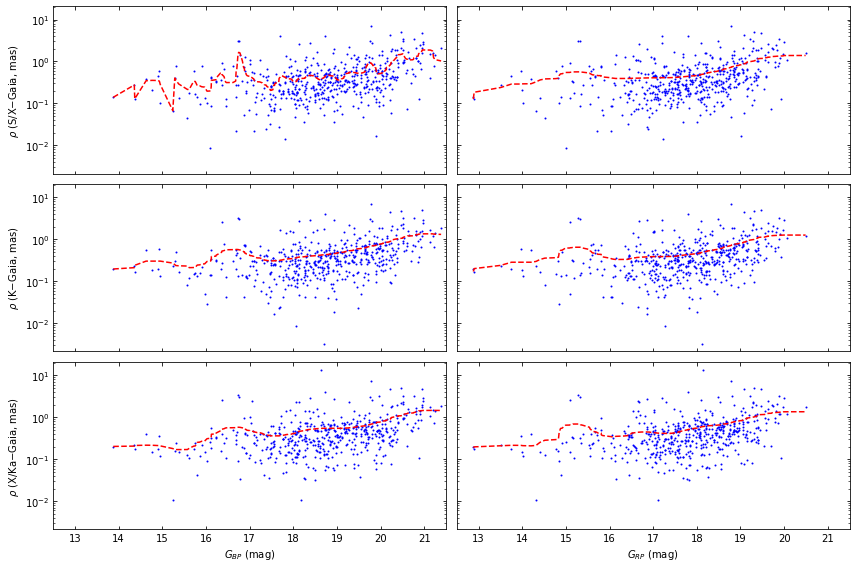

In [10]:
# Distribution of angular separation
fig, ((ax0, ax1), 
      (ax2, ax3), 
      (ax4, ax5))= plt.subplots(figsize=(12, 8), nrows=3, ncols=2, sharex=True, sharey=True)

# BP
ax0.plot(x_bp, y_sx_bp, "b.", ms=2)
ax2.plot(x_bp, y_k_bp, ".b", ms=2)
ax4.plot(x_bp, y_xka_bp, "b.", ms=2)

# RP
ax1.plot(x_rp, y_sx_rp, "b.", ms=2)
ax3.plot(x_rp, y_k_rp, ".b", ms=2)
ax5.plot(x_rp, y_xka_rp, "b.", ms=2)

# Smoothed data
ax0.plot(x_bp, nw_mean_sx_bp, "r--")
ax2.plot(x_bp, nw_mean_k_bp, "r--")
ax4.plot(x_bp, nw_mean_xka_bp, "r--")
ax1.plot(x_rp, nw_mean_sx_rp, "r--")
ax3.plot(x_rp, nw_mean_k_rp, "r--")
ax5.plot(x_rp, nw_mean_xka_rp, "r--")

ax0.set_xlim([12.5, 21.5])

ax0.set_ylabel("$\\rho$ (S/X$-$Gaia, mas)")
ax2.set_ylabel("$\\rho$ (K$-$Gaia, mas)")
ax4.set_ylabel("$\\rho$ (X/Ka$-$Gaia, mas)")
ax4.set_xlabel("$G_{BP}$ (mag)")
ax5.set_xlabel("$G_{RP}$ (mag)")

ax0.set_yscale("log")

plt.subplots_adjust()
plt.tight_layout()

Similar trend to G magnitude.

# 2 normalized separation $X$ vs. magnitude

## 2.1 $X$ vs. G

In [41]:
keys = "g_mag"
r2o.sort(keys)

x = np.array(r2o[keys])
y_sx = np.array(r2o["nor_sep_sx_cor"])
y_k = np.array(r2o["nor_sep_k_cor"])
y_xka = np.array(r2o["nor_sep_ka_cor"])

nw_mean_sx = NWSmooth(x, y_sx)
nw_mean_k = NWSmooth(x, y_k)
nw_mean_xka = NWSmooth(x, y_xka)

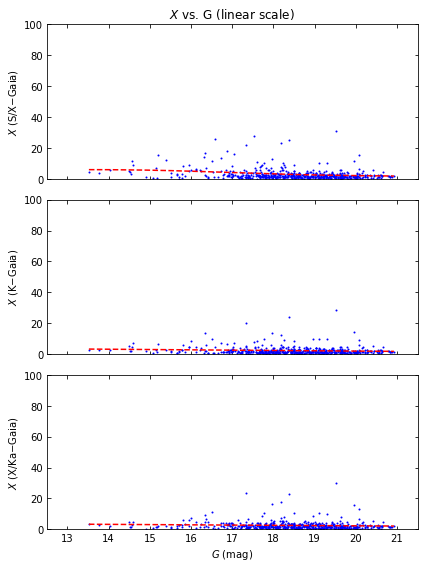

In [12]:
# Distribution of angular separation
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(6, 8), nrows=3, sharex=True, sharey=True)

ax0.plot(x, y_sx, "b.", ms=2)
ax1.plot(x, y_k, ".b", ms=2)
ax2.plot(x, y_xka, "b.", ms=2)

# Smoothed data
ax0.plot(x, nw_mean_sx, "r--")
ax1.plot(x, nw_mean_k, "r--")
ax2.plot(x, nw_mean_xka, "r--")

ax0.set_xlim([12.5, 21.5])
ax0.set_ylim([0, 100])

ax0.set_ylabel("$X$ (S/X$-$Gaia)")
ax1.set_ylabel("$X$ (K$-$Gaia)")
ax2.set_ylabel("$X$ (X/Ka$-$Gaia)")
ax2.set_xlabel("$G$ (mag)")
ax0.set_title("$X$ vs. G (linear scale)")

plt.subplots_adjust()
plt.tight_layout()

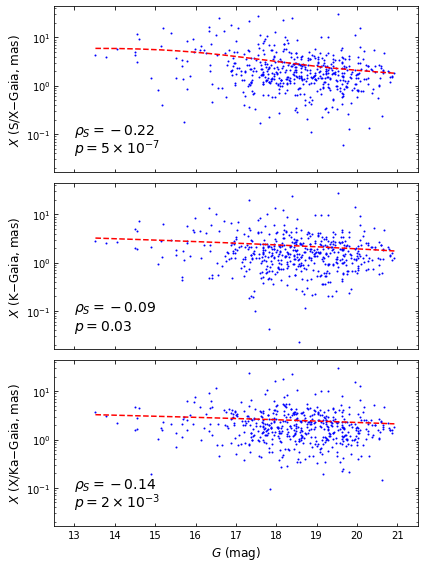

In [42]:
# Distribution of angular separation
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(6, 8), nrows=3, sharex=True, sharey=True)

ax0.plot(x, y_sx, "b.", ms=2)
ax1.plot(x, y_k, ".b", ms=2)
ax2.plot(x, y_xka, "b.", ms=2)

# Smoothed data
ax0.plot(x, nw_mean_sx, "r--")
ax1.plot(x, nw_mean_k, "r--")
ax2.plot(x, nw_mean_xka, "r--")

ax0.set_xlim([12.5, 21.5])

ax0.set_ylabel("$X$ (S/X$-$Gaia, mas)", fontsize=12)
ax1.set_ylabel("$X$ (K$-$Gaia, mas)", fontsize=12)
ax2.set_ylabel("$X$ (X/Ka$-$Gaia, mas)", fontsize=12)
ax2.set_xlabel("$G$ (mag)", fontsize=12)

ax0.set_yscale("log")
ax1.set_yscale("log")
ax2.set_yscale("log")

# lab_x, lab_y = 13, 0.1
# ax0.text(lab_x, lab_y, "$S/X$-band", fontsize=15, bbox=dict(facecolor="none"))
# ax1.text(lab_x, lab_y, "$K$-band", fontsize=15, bbox=dict(facecolor="none"))
# ax2.text(lab_x, lab_y, "$X/Ka$-band", fontsize=15, bbox=dict(facecolor="none"))

cordx1, cordy1 = 13, 0.1
cordx2, cordy2 = 13, 0.04

ax0.text(cordx1, cordy1, "$\\rho_S=-0.22$", fontsize=14)
ax0.text(cordx1, cordy2, "$p=5\\times 10^{-7}$", fontsize=14)

ax1.text(cordx1, cordy1, "$\\rho_S=-0.09$", fontsize=14)
ax1.text(cordx1, cordy2, "$p=0.03$", fontsize=14)

ax2.text(cordx1, cordy1, "$\\rho_S=-0.14$", fontsize=14)
ax2.text(cordx1, cordy2, "$p=2\\times 10^{-3}$", fontsize=14)

plt.subplots_adjust()
plt.tight_layout()
plt.savefig("../plots/X-G.eps")

In [14]:
new_corr_test(x, [y_sx, y_k, y_xka], [nw_mean_sx, nw_mean_k, nw_mean_xka],
              obj_name="X vs. G-mag",
              ylabel=["SX", "K", "XKa"])

X vs. G-mag
            Pearson    p-val    Spearman    p-val    Kendall    p-val
-----------------------------------------------------------------
Original
-----------------------------------------------------------------
SX          -2.4e-01   4.5e-08  -2.2e-01   5.2e-07  -1.5e-01   6.1e-07
K           -1.0e-01   2.2e-02  -9.4e-02   3.3e-02  -6.1e-02   3.8e-02
XKa         -7.5e-02   9.1e-02  -1.4e-01   1.7e-03  -9.1e-02   2.0e-03
-----------------------------------------------------------------
Smoothed
SX          -9.9e-01   0.0e+00  -1.0e+00   0.0e+00  -1.0e+00   0.0e+00
K           -1.0e+00   0.0e+00  -1.0e+00   0.0e+00  -1.0e+00   0.0e+00
XKa         -1.0e+00   0.0e+00  -1.0e+00   0.0e+00  -1.0e+00   0.0e+00
-----------------------------------------------------------------


Some negative correlation is seen.

## 2.2 $X$ vs. $G_{BP}$/$G_{RP}$

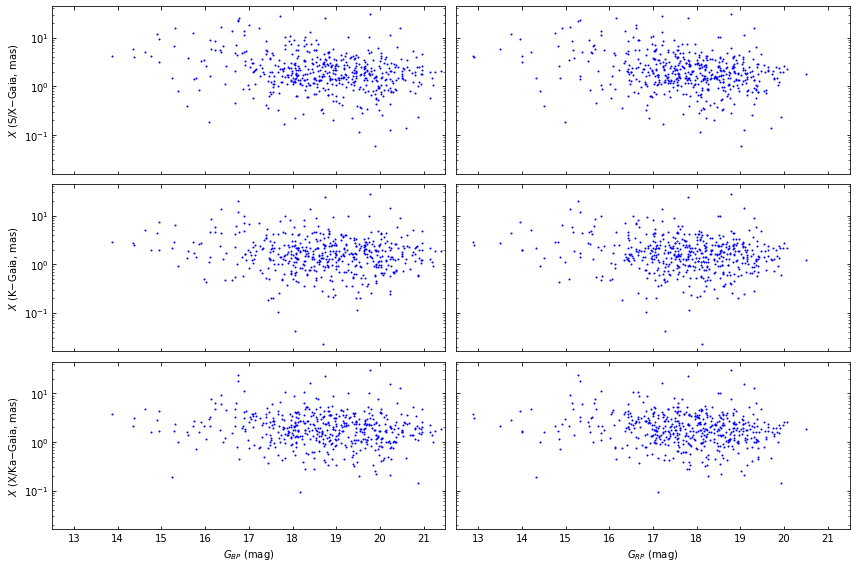

In [15]:
# Distribution of angular separation
fig, ((ax0, ax1), 
      (ax2, ax3), 
      (ax4, ax5))= plt.subplots(figsize=(12, 8), nrows=3, ncols=2, sharex=True, sharey=True)

# BP
ax0.plot(r2o["bp_mag"], r2o["nor_sep_sx_cor"], "b.", ms=2)
ax2.plot(r2o["bp_mag"], r2o["nor_sep_k_cor"], ".b", ms=2)
ax4.plot(r2o["bp_mag"], r2o["nor_sep_ka_cor"], "b.", ms=2)
# RP
ax1.plot(r2o["rp_mag"], r2o["nor_sep_sx_cor"], "b.", ms=2)
ax3.plot(r2o["rp_mag"], r2o["nor_sep_k_cor"], ".b", ms=2)
ax5.plot(r2o["rp_mag"], r2o["nor_sep_ka_cor"], "b.", ms=2)

ax0.set_xlim([12.5, 21.5])

ax0.set_ylabel("$X$ (S/X$-$Gaia, mas)")
ax2.set_ylabel("$X$ (K$-$Gaia, mas)")
ax4.set_ylabel("$X$ (X/Ka$-$Gaia, mas)")
ax4.set_xlabel("$G_{BP}$ (mag)")
ax5.set_xlabel("$G_{RP}$ (mag)")

ax0.set_yscale("log")

plt.subplots_adjust()
plt.tight_layout()

# 3 correlation between radio band and G magnitude

## 3.1 $G$ magnitude

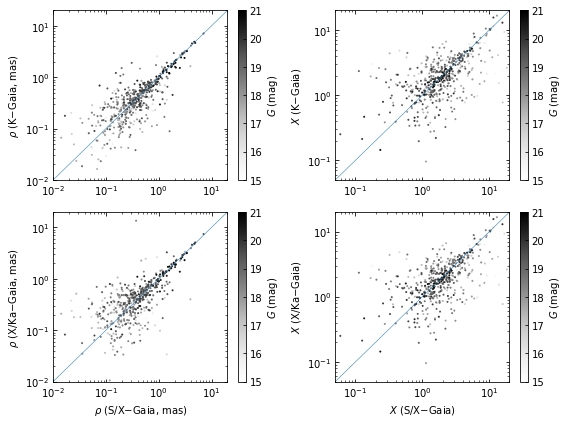

In [16]:
r2o.sort("g_mag")

# Distribution of angular separation
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(
    figsize=(8, 6), nrows=2, ncols=2)

sc0 = ax0.scatter(r2o["ang_sep_sx_cor"], r2o["ang_sep_k_cor"], c=r2o["g_mag"],
                  s=1, vmin=15, vmax=21, cmap="Greys")
plt.colorbar(sc0, label="$G$ (mag)", fraction=0.1, ax=ax0)

sc1 = ax1.scatter(r2o["nor_sep_sx_cor"], r2o["nor_sep_ka_cor"], c=r2o["g_mag"],
                  s=1, vmin=15, vmax=21, cmap="Greys")
plt.colorbar(sc1, label="$G$ (mag)", fraction=0.1, ax=ax1)

sc2 = ax2.scatter(r2o["ang_sep_sx_cor"], r2o["ang_sep_ka_cor"], c=r2o["g_mag"],
                  s=1, vmin=15, vmax=21, cmap="Greys")
plt.colorbar(sc2, label="$G$ (mag)", fraction=0.1, ax=ax2)

sc3 = ax3.scatter(r2o["nor_sep_sx_cor"], r2o["nor_sep_ka_cor"], c=r2o["g_mag"],
                  s=1, vmin=15, vmax=21, cmap="Greys")
plt.colorbar(sc3, label="$G$ (mag)", fraction=0.1, ax=ax3)

ax0.set_ylabel("$\\rho$ (K$-$Gaia, mas)")
ax2.set_ylabel("$\\rho$ (X/Ka$-$Gaia, mas)")
ax2.set_xlabel("$\\rho$ (S/X$-$Gaia, mas)")
ax0.set_xlim([0.01, 20])
ax0.set_ylim([0.01, 20])
ax2.set_xlim([0.01, 20])
ax2.set_ylim([0.01, 20])
ax0.set_xscale("log")
ax0.set_yscale("log")
ax2.set_xscale("log")
ax2.set_yscale("log")

x = np.linspace(0.01, 20, 100)
ax0.plot(x, x, lw=0.5)
ax2.plot(x, x, lw=0.5)

ax1.set_ylabel("$X$ (K$-$Gaia)")
ax3.set_ylabel("$X$ (X/Ka$-$Gaia)")
ax3.set_xlabel("$X$ (S/X$-$Gaia)")
ax1.set_xlim([0.05, 20])
ax1.set_ylim([0.05, 20])
ax3.set_xlim([0.05, 20])
ax3.set_ylim([0.05, 20])
ax1.set_xscale("log")
ax1.set_yscale("log")
ax3.set_xscale("log")
ax3.set_yscale("log")

x = np.linspace(0.05, 20, 100)
ax1.plot(x, x, lw=0.5)
ax3.plot(x, x, lw=0.5)

plt.subplots_adjust()
plt.tight_layout()

## 3.2 $G_{BP}$ magnitude

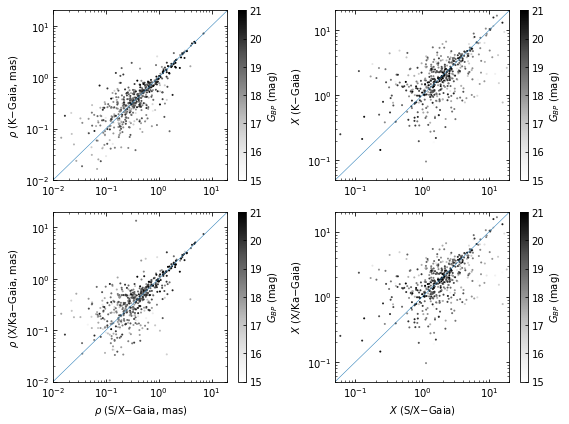

In [17]:
r2o.sort("bp_mag")

# Distribution of angular separation
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(
    figsize=(8, 6), nrows=2, ncols=2)

sc0 = ax0.scatter(r2o["ang_sep_sx_cor"], r2o["ang_sep_k_cor"], c=r2o["bp_mag"],
                  s=1, vmin=15, vmax=21, cmap="Greys")
plt.colorbar(sc0, label="$G_{BP}$ (mag)", fraction=0.1, ax=ax0)

sc1 = ax1.scatter(r2o["nor_sep_sx_cor"], r2o["nor_sep_ka_cor"], c=r2o["bp_mag"],
                  s=1, vmin=15, vmax=21, cmap="Greys")
plt.colorbar(sc1, label="$G_{BP}$ (mag)", fraction=0.1, ax=ax1)

sc2 = ax2.scatter(r2o["ang_sep_sx_cor"], r2o["ang_sep_ka_cor"], c=r2o["bp_mag"],
                  s=1, vmin=15, vmax=21, cmap="Greys")
plt.colorbar(sc2, label="$G_{BP}$ (mag)", fraction=0.1, ax=ax2)

sc3 = ax3.scatter(r2o["nor_sep_sx_cor"], r2o["nor_sep_ka_cor"], c=r2o["bp_mag"],
                  s=1, vmin=15, vmax=21, cmap="Greys")
plt.colorbar(sc3, label="$G_{BP}$ (mag)", fraction=0.1, ax=ax3)

ax0.set_ylabel("$\\rho$ (K$-$Gaia, mas)")
ax2.set_ylabel("$\\rho$ (X/Ka$-$Gaia, mas)")
ax2.set_xlabel("$\\rho$ (S/X$-$Gaia, mas)")
ax0.set_xlim([0.01, 20])
ax0.set_ylim([0.01, 20])
ax2.set_xlim([0.01, 20])
ax2.set_ylim([0.01, 20])
ax0.set_xscale("log")
ax0.set_yscale("log")
ax2.set_xscale("log")
ax2.set_yscale("log")

x = np.linspace(0.01, 20, 100)
ax0.plot(x, x, lw=0.5)
ax2.plot(x, x, lw=0.5)

ax1.set_ylabel("$X$ (K$-$Gaia)")
ax3.set_ylabel("$X$ (X/Ka$-$Gaia)")
ax3.set_xlabel("$X$ (S/X$-$Gaia)")
ax1.set_xlim([0.05, 20])
ax1.set_ylim([0.05, 20])
ax3.set_xlim([0.05, 20])
ax3.set_ylim([0.05, 20])
ax1.set_xscale("log")
ax1.set_yscale("log")
ax3.set_xscale("log")
ax3.set_yscale("log")

x = np.linspace(0.05, 20, 100)
ax1.plot(x, x, lw=0.5)
ax3.plot(x, x, lw=0.5)

plt.subplots_adjust()
plt.tight_layout()

## 3.3 $G_{RP}$ magnitude

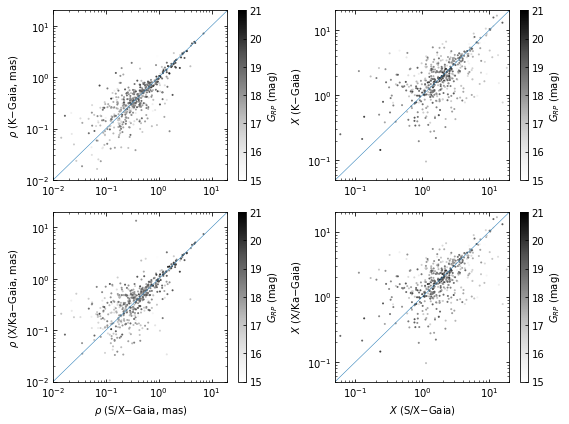

In [18]:
r2o.sort("rp_mag")

# Distribution of angular separation
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(
    figsize=(8, 6), nrows=2, ncols=2)

sc0 = ax0.scatter(r2o["ang_sep_sx_cor"], r2o["ang_sep_k_cor"], c=r2o["rp_mag"],
                  s=1, vmin=15, vmax=21, cmap="Greys")
plt.colorbar(sc0, label="$G_{RP}$ (mag)", fraction=0.1, ax=ax0)

sc1 = ax1.scatter(r2o["nor_sep_sx_cor"], r2o["nor_sep_ka_cor"], c=r2o["rp_mag"],
                  s=1, vmin=15, vmax=21, cmap="Greys")
plt.colorbar(sc1, label="$G_{RP}$ (mag)", fraction=0.1, ax=ax1)

sc2 = ax2.scatter(r2o["ang_sep_sx_cor"], r2o["ang_sep_ka_cor"], c=r2o["rp_mag"],
                  s=1, vmin=15, vmax=21, cmap="Greys")
plt.colorbar(sc2, label="$G_{RP}$ (mag)", fraction=0.1, ax=ax2)

sc3 = ax3.scatter(r2o["nor_sep_sx_cor"], r2o["nor_sep_ka_cor"], c=r2o["rp_mag"],
                  s=1, vmin=15, vmax=21, cmap="Greys")
plt.colorbar(sc3, label="$G_{RP}$ (mag)", fraction=0.1, ax=ax3)

ax0.set_ylabel("$\\rho$ (K$-$Gaia, mas)")
ax2.set_ylabel("$\\rho$ (X/Ka$-$Gaia, mas)")
ax2.set_xlabel("$\\rho$ (S/X$-$Gaia, mas)")
ax0.set_xlim([0.01, 20])
ax0.set_ylim([0.01, 20])
ax2.set_xlim([0.01, 20])
ax2.set_ylim([0.01, 20])
ax0.set_xscale("log")
ax0.set_yscale("log")
ax2.set_xscale("log")
ax2.set_yscale("log")

x = np.linspace(0.01, 20, 100)
ax0.plot(x, x, lw=0.5)
ax2.plot(x, x, lw=0.5)

ax1.set_ylabel("$X$ (K$-$Gaia)")
ax3.set_ylabel("$X$ (X/Ka$-$Gaia)")
ax3.set_xlabel("$X$ (S/X$-$Gaia)")
ax1.set_xlim([0.05, 20])
ax1.set_ylim([0.05, 20])
ax3.set_xlim([0.05, 20])
ax3.set_ylim([0.05, 20])
ax1.set_xscale("log")
ax1.set_yscale("log")
ax3.set_xscale("log")
ax3.set_yscale("log")

x = np.linspace(0.05, 20, 100)
ax1.plot(x, x, lw=0.5)
ax3.plot(x, x, lw=0.5)

plt.subplots_adjust()
plt.tight_layout()

# 4 correlation test

I will perform the correlation test to check if the radio-to-optical offset is dependent on the G magnitude (or $G_{BP}$, or $G_{RP}$).

In [19]:
from CorrTest import R2OCorrTest

# Sort the table
# by G-mag
r2o.sort("g_mag")
mask = np.isfinite(r2o["g_mag"])
r2o_g = r2o[mask]
r2o_g.keep_columns(["ang_sep_sx_cor", "nor_sep_sx_cor",
                    "ang_sep_k_cor", "nor_sep_k_cor",
                    "ang_sep_ka_cor", "nor_sep_ka_cor",
                    "g_mag"])

# by BP-mag
r2o.sort("bp_mag")
mask = np.isfinite(r2o["bp_mag"])
r2o_b = r2o[mask]
# Remove sources without measurements
r2o_b.keep_columns(["ang_sep_sx_cor", "nor_sep_sx_cor",
                    "ang_sep_k_cor", "nor_sep_k_cor",
                    "ang_sep_ka_cor", "nor_sep_ka_cor",
                    "bp_mag"])

# by RP-mag
r2o.sort("rp_mag")
mask = np.isfinite(r2o["rp_mag"])
r2o_r = r2o[mask]
r2o_r.keep_columns(["ang_sep_sx_cor", "nor_sep_sx_cor",
                    "ang_sep_k_cor", "nor_sep_k_cor",
                    "ang_sep_ka_cor", "nor_sep_ka_cor",
                    "rp_mag"])

print("G-mag is available for {} sources, BP-mag for {}, and RP for {}".format(len(r2o_g), 
                                                                               len(r2o_b), 
                                                                               len(r2o_r)))

# critical value of p
p_lim = 0.05

G-mag is available for 512 sources, BP-mag for 508, and RP for 508


## 4.1 with $G$ magnitude
### 4.1.1 $\rho$ vs. $G$

In [20]:
# Array of bin size
bin_array = np.arange(1, 51, 5)

rho_corr, x_corr = R2OCorrTest(r2o_g, "g_mag", bin_array)

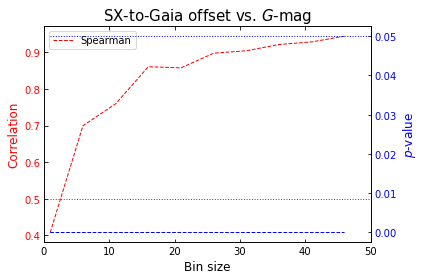

In [21]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
# ax1.plot(bin_array, rho_corr["r_sx"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_sx"], color="r", lw=1, ls="--", label="Spearman")
# ax1.plot(bin_array, rho_corr["tau_sx"], color="r", lw=1, ls="-.", label="Kendall")

# Critical value of correlation coefficient
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
# ax2.plot(bin_array, rho_corr["rp_sx"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_sx"], color="b", lw=1, ls="--", label="Spearman")
# ax2.plot(bin_array, rho_corr["taup_sx"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(p_lim, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("SX-to-Gaia offset vs. $G$-mag", fontsize=15)
fig.tight_layout()

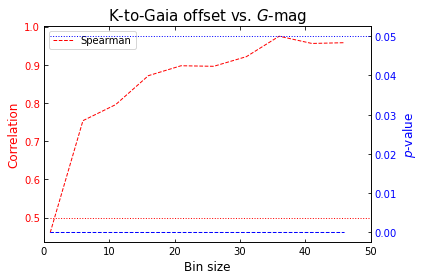

In [22]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
# ax1.plot(bin_array, rho_corr["r_k"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_k"], color="r", lw=1, ls="--", label="Spearman")
# ax1.plot(bin_array, rho_corr["tau_k"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
# ax2.plot(bin_array, rho_corr["rp_k"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_k"], color="b", lw=1, ls="--", label="Spearman")
# ax2.plot(bin_array, rho_corr["taup_k"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(p_lim, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("K-to-Gaia offset vs. $G$-mag", fontsize=15)
fig.tight_layout()

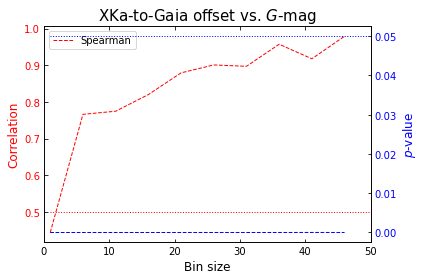

In [23]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
# ax1.plot(bin_array, rho_corr["r_ka"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_ka"], color="r", lw=1, ls="--", label="Spearman")
# ax1.plot(bin_array, rho_corr["tau_ka"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
# ax2.plot(bin_array, rho_corr["rp_ka"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_ka"], color="b", lw=1, ls="--", label="Spearman")
# ax2.plot(bin_array, rho_corr["taup_ka"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(p_lim, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("XKa-to-Gaia offset vs. $G$-mag", fontsize=15)
fig.tight_layout()

As seen from three plots above, the correlation between radio-to-optical distance and $G$ magnitude is solid.

### 4.1.2 $X$ vs. $G$

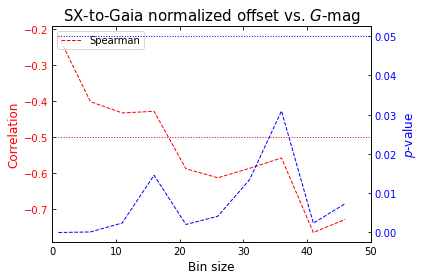

In [24]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
# ax1.plot(bin_array, x_corr["r_sx"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_sx"], color="r", lw=1, ls="--", label="Spearman")
# ax1.plot(bin_array, x_corr["tau_sx"], color="r", lw=1, ls="-.", label="Kendall")

# Critical value of correlation coefficient
ax1.hlines(-0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
# ax2.plot(bin_array, x_corr["rp_sx"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_sx"], color="b", lw=1, ls="--", label="Spearman")
# ax2.plot(bin_array, x_corr["taup_sx"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(p_lim, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("SX-to-Gaia normalized offset vs. $G$-mag", fontsize=15)
fig.tight_layout()

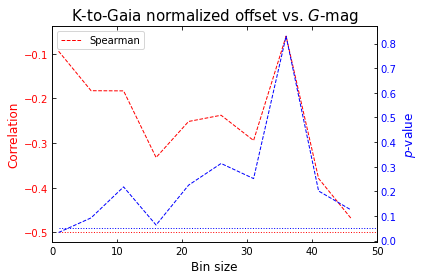

In [25]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
# ax1.plot(bin_array, x_corr["r_k"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_k"], color="r", lw=1, ls="--", label="Spearman")
# ax1.plot(bin_array, x_corr["tau_k"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(-0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
# ax2.plot(bin_array, x_corr["rp_k"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_k"], color="b", lw=1, ls="--", label="Spearman")
# ax2.plot(bin_array, x_corr["taup_k"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(p_lim, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("K-to-Gaia normalized offset vs. $G$-mag", fontsize=15)
fig.tight_layout()

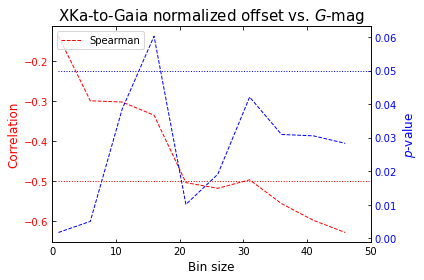

In [26]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
# ax1.plot(bin_array, x_corr["r_ka"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_ka"], color="r", lw=1, ls="--", label="Spearman")
# ax1.plot(bin_array, x_corr["tau_ka"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(-0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
# ax2.plot(bin_array, x_corr["rp_ka"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_ka"], color="b", lw=1, ls="--", label="Spearman")
# ax2.plot(bin_array, x_corr["taup_ka"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(p_lim, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("XKa-to-Gaia normalized offset vs. $G$-mag", fontsize=15)
fig.tight_layout()

As for the normalized separation, only SX-to-Gaia offset shows a negative correlation.

## 4.2 with $G_{BP}$ magnitude
### 4.2.1 $\rho$ vs. $G_{BP}$

In [27]:
# Array of bin size
bin_array = np.arange(1, 51, 2)

rho_corr, x_corr = R2OCorrTest(r2o_b, "bp_mag", bin_array)

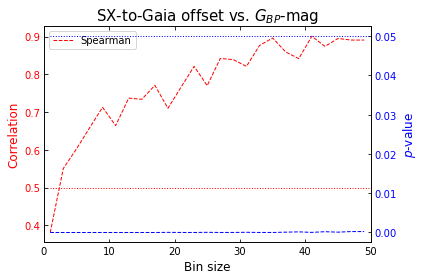

In [28]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
# ax1.plot(bin_array, rho_corr["r_sx"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_sx"], color="r", lw=1, ls="--", label="Spearman")
# ax1.plot(bin_array, rho_corr["tau_sx"], color="r", lw=1, ls="-.", label="Kendall")

# Critical value of correlation coefficient
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
# ax2.plot(bin_array, rho_corr["rp_sx"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_sx"], color="b", lw=1, ls="--", label="Spearman")
# ax2.plot(bin_array, rho_corr["taup_sx"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(p_lim, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("SX-to-Gaia offset vs. $G_{BP}$-mag", fontsize=15)
fig.tight_layout()

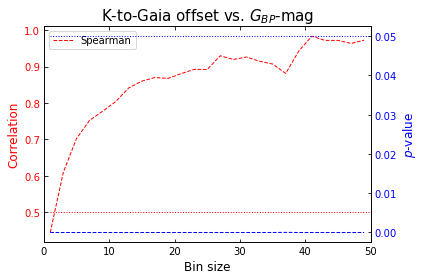

In [29]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
# ax1.plot(bin_array, rho_corr["r_k"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_k"], color="r", lw=1, ls="--", label="Spearman")
# ax1.plot(bin_array, rho_corr["tau_k"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
# ax2.plot(bin_array, rho_corr["rp_k"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_k"], color="b", lw=1, ls="--", label="Spearman")
# ax2.plot(bin_array, rho_corr["taup_k"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(p_lim, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("K-to-Gaia offset vs. $G_{BP}$-mag", fontsize=15)
fig.tight_layout()

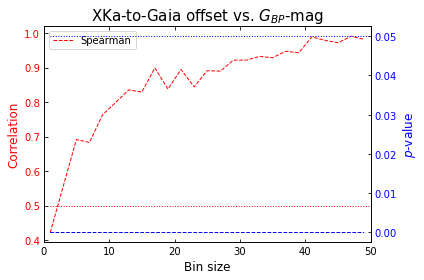

In [30]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
# ax1.plot(bin_array, rho_corr["r_ka"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_ka"], color="r", lw=1, ls="--", label="Spearman")
# ax1.plot(bin_array, rho_corr["tau_ka"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
# ax2.plot(bin_array, rho_corr["rp_ka"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_ka"], color="b", lw=1, ls="--", label="Spearman")
# ax2.plot(bin_array, rho_corr["taup_ka"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(p_lim, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("XKa-to-Gaia offset vs. $G_{BP}$-mag", fontsize=15)
fig.tight_layout()

The results for $BP$ magnitude are similar to those of $G$ magnitude.

### 4.2.2 $X$ vs. $G$

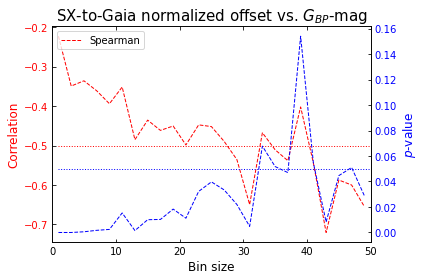

In [31]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
# ax1.plot(bin_array, x_corr["r_sx"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_sx"], color="r", lw=1, ls="--", label="Spearman")
# ax1.plot(bin_array, x_corr["tau_sx"], color="r", lw=1, ls="-.", label="Kendall")

# Critical value of correlation coefficient
ax1.hlines(-0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
# ax2.plot(bin_array, x_corr["rp_sx"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_sx"], color="b", lw=1, ls="--", label="Spearman")
# ax2.plot(bin_array, x_corr["taup_sx"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(p_lim, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("SX-to-Gaia normalized offset vs. $G_{BP}$-mag", fontsize=15)
fig.tight_layout()

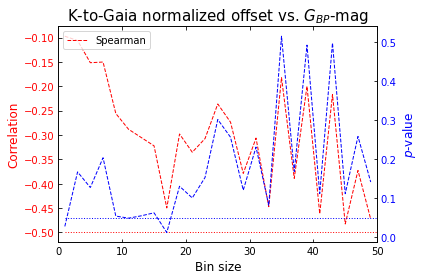

In [32]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
# ax1.plot(bin_array, x_corr["r_k"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_k"], color="r", lw=1, ls="--", label="Spearman")
# ax1.plot(bin_array, x_corr["tau_k"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(-0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
# ax2.plot(bin_array, x_corr["rp_k"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_k"], color="b", lw=1, ls="--", label="Spearman")
# ax2.plot(bin_array, x_corr["taup_k"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(p_lim, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("K-to-Gaia normalized offset vs. $G_{BP}$-mag", fontsize=15)
fig.tight_layout()

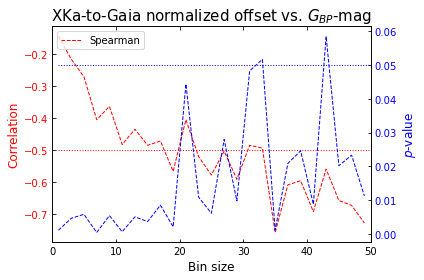

In [33]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
# ax1.plot(bin_array, x_corr["r_ka"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_ka"], color="r", lw=1, ls="--", label="Spearman")
# ax1.plot(bin_array, x_corr["tau_ka"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(-0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
# ax2.plot(bin_array, x_corr["rp_ka"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_ka"], color="b", lw=1, ls="--", label="Spearman")
# ax2.plot(bin_array, x_corr["taup_ka"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(p_lim, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("XKa-to-Gaia normalized offset vs. $G_{BP}$-mag", fontsize=15)
fig.tight_layout()

## 4.3 with $G_{RP}$ magnitude
### 4.3.1 $\rho$ vs. $G_{RP}$

In [34]:
# Array of bin size
bin_array = np.arange(1, 51, 2)

rho_corr, x_corr = R2OCorrTest(r2o_r, "rp_mag", bin_array)

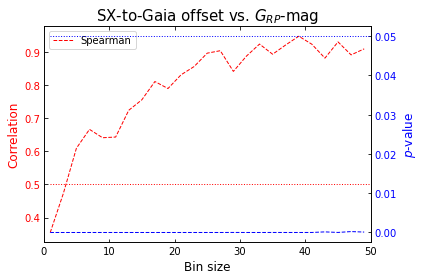

In [35]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
# ax1.plot(bin_array, rho_corr["r_sx"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_sx"], color="r", lw=1, ls="--", label="Spearman")
# ax1.plot(bin_array, rho_corr["tau_sx"], color="r", lw=1, ls="-.", label="Kendall")

# Critical value of correlation coefficient
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
# ax2.plot(bin_array, rho_corr["rp_sx"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_sx"], color="b", lw=1, ls="--", label="Spearman")
# ax2.plot(bin_array, rho_corr["taup_sx"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(p_lim, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("SX-to-Gaia offset vs. $G_{RP}$-mag", fontsize=15)
fig.tight_layout()

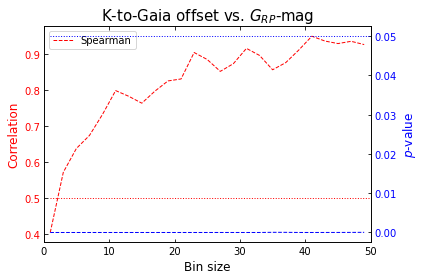

In [36]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
# ax1.plot(bin_array, rho_corr["r_k"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_k"], color="r", lw=1, ls="--", label="Spearman")
# ax1.plot(bin_array, rho_corr["tau_k"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
# ax2.plot(bin_array, rho_corr["rp_k"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_k"], color="b", lw=1, ls="--", label="Spearman")
# ax2.plot(bin_array, rho_corr["taup_k"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(p_lim, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("K-to-Gaia offset vs. $G_{RP}$-mag", fontsize=15)
fig.tight_layout()

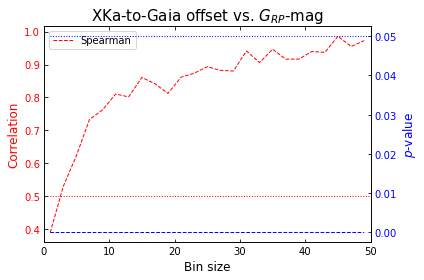

In [37]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
# ax1.plot(bin_array, rho_corr["r_ka"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_ka"], color="r", lw=1, ls="--", label="Spearman")
# ax1.plot(bin_array, rho_corr["tau_ka"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
# ax2.plot(bin_array, rho_corr["rp_ka"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_ka"], color="b", lw=1, ls="--", label="Spearman")
# ax2.plot(bin_array, rho_corr["taup_ka"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(p_lim, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("XKa-to-Gaia offset vs. $G_{RP}$-mag", fontsize=15)
fig.tight_layout()

### 4.3.2 $X$ vs. $G$

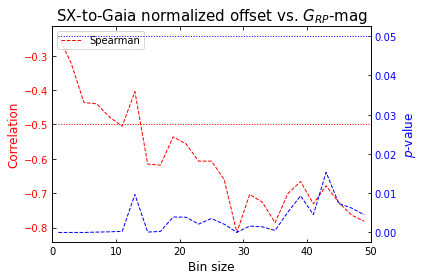

In [38]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
# ax1.plot(bin_array, x_corr["r_sx"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_sx"], color="r", lw=1, ls="--", label="Spearman")
# ax1.plot(bin_array, x_corr["tau_sx"], color="r", lw=1, ls="-.", label="Kendall")

# Critical value of correlation coefficient
ax1.hlines(-0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
# ax2.plot(bin_array, x_corr["rp_sx"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_sx"], color="b", lw=1, ls="--", label="Spearman")
# ax2.plot(bin_array, x_corr["taup_sx"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(p_lim, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("SX-to-Gaia normalized offset vs. $G_{RP}$-mag", fontsize=15)
fig.tight_layout()

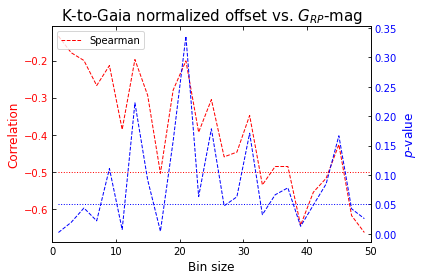

In [39]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
# ax1.plot(bin_array, x_corr["r_k"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_k"], color="r", lw=1, ls="--", label="Spearman")
# ax1.plot(bin_array, x_corr["tau_k"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(-0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
# ax2.plot(bin_array, x_corr["rp_k"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_k"], color="b", lw=1, ls="--", label="Spearman")
# ax2.plot(bin_array, x_corr["taup_k"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(p_lim, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("K-to-Gaia normalized offset vs. $G_{RP}$-mag", fontsize=15)
fig.tight_layout()

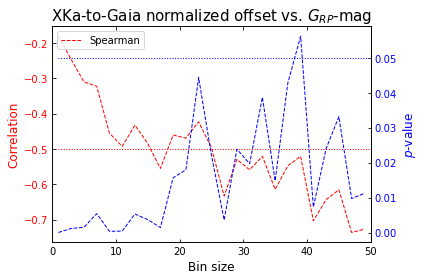

In [40]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
# ax1.plot(bin_array, x_corr["r_ka"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_ka"], color="r", lw=1, ls="--", label="Spearman")
# ax1.plot(bin_array, x_corr["tau_ka"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(-0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
# ax2.plot(bin_array, x_corr["rp_ka"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_ka"], color="b", lw=1, ls="--", label="Spearman")
# ax2.plot(bin_array, x_corr["taup_ka"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(p_lim, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("XKa-to-Gaia normalized offset vs. $G_{RP}$-mag", fontsize=15)
fig.tight_layout()

Here again, results of the $RP$ magnitude is similar to what we have found for $G$ magnitude.